In [2]:
import os
import sys
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
# Root directory of the project
ROOT_DIR = os.path.abspath("/home/s6207967/RE_Mask_RCNN") ## PATH_TO_YOUR_WORK_DIRECTORY

# Import Mask RCNN from the Github installation
sys.path.append(ROOT_DIR)  # To find local version
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from mrcnn.model import log

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


# Import COCO config for the dataset
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version of coco
from RE_Mask_RCNN.updated_mask_rcnn.samples.coco import coco

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to your trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "updated_mask_rcnn/samples/mask_rcnn_coco.h5")


class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
config = InferenceConfig()

Using TensorFlow backend.


In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
# Load weights trained on the COCO dataset
model.load_weights(COCO_MODEL_PATH, by_name=True)

Image 22 will be processed soon...
Processing:  /home/s6207967/RE_Mask_RCNN/image2/22.jpg


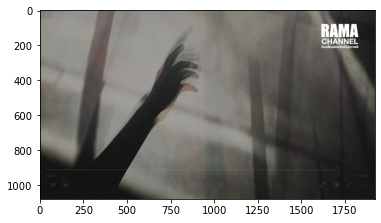

Predicting the Image...
Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Prediction Done!
Counting Mask...
Counting Done!
Image 23 will be processed soon...
Processing:  /home/s6207967/RE_Mask_RCNN/image2/23.jpg


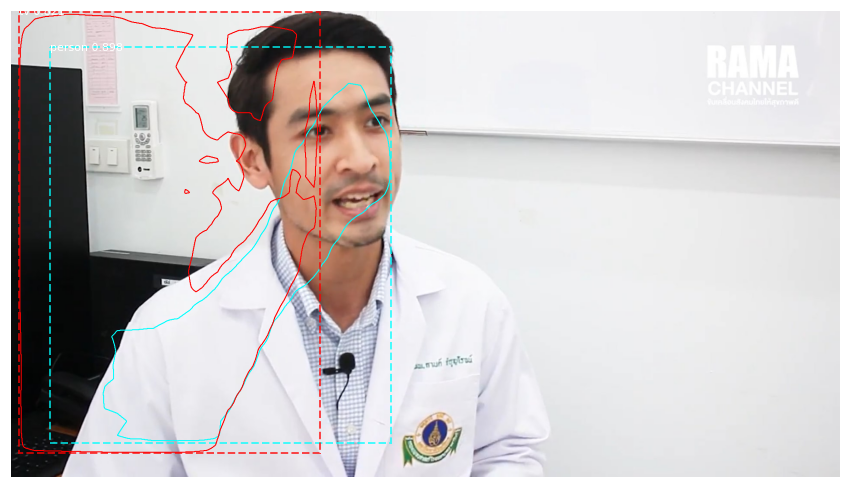

Predicting the Image...
Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
                   'bus', 'train', 'truck', 'boat', 'traffic light',
                   'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
                   'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
                   'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
                   'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
                   'kite', 'baseball bat', 'baseball glove', 'skateboard',
                   'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
                   'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
                   'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                   'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
                   'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
                   'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
                   'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
                   'teddy bear', 'hair drier', 'toothbrush']


listdf1 = []

# Load the image for current task
for i in range(21,24,1):
    print("Image " + str(i+1) + " will be processed soon...")
    image_path = "/home/s6207967/RE_Mask_RCNN/image2/" + str(i+1) +".jpg"
    print("Processing: ", image_path)
    img = load_img(image_path)
    img = img_to_array(img)

    img = mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    plt.show()
    
    # Make prediction
    print('Predicting the Image...')
    results = model.detect([img], verbose=1)
    print("Prediction Done!")
    
    # get dictionary for first prediction
    %matplotlib inline
    image_results = results[0]

    box, mask, classID, score = image_results['rois'], image_results['masks'], image_results['class_ids'], image_results['scores']

    # show photo with bounding boxes, masks, class labels and scores
    fig_images, cur_ax = plt.subplots(figsize=(15, 15))
    display_instances(img, box, mask, classID, class_names, score, ax=cur_ax)




    df=pd.DataFrame(box)
    df.columns =['x1','y1','x2','y2']
    df['score'] = score
    df['classID'] = classID

    print("Counting Mask...")
    maskt=mask.transpose()
    cntmask=[]
    for j in range(len(maskt)):
        sum=0

        for x in maskt[j]:
            for y in x:
                sum+=y
        cntmask.append(sum)

    df['cntmask'] = cntmask
    print("Counting Done!")

#     listdf1.append(df)
#     print(listdf1, "\n")
    df.to_csv('df2_'+str(i+1))
